In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as npimport pandas as pd

In [9]:
# index of 1st day of each month
emptyingDays = [1,32,60,91,121,152,182,213,244,274,305,335]

# Probability of manure being emptied for each month
pEmptyingDays = [0.00,0.03,0.25,0.86,0.66,0.50,0.33,0.27,0.09,0.00,0.00,0.00]

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

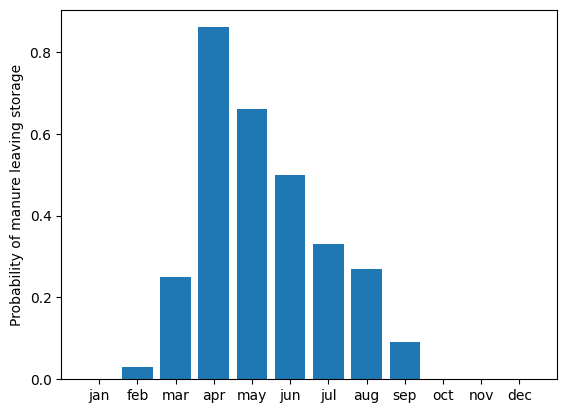

In [10]:
plt.bar(months, pEmptyingDays)
plt.ylabel('Probability of manure leaving storage')
plt.show()

In [12]:
# monte carlo simulation of storage period
iterations = 10000

monteCarloPeriod = np.zeros(365*2)
storageLength = []

for i in range(iterations):
    # reset storedDays and CH4
    storedDays = np.zeros(365*2)
    
    # pick random day for manure to spawn
    spawnDay = np.random.randint(0, 365)

    # for each day in two years
    for day in range(len(storedDays)):
        # if its time, spawn manure
        if day == spawnDay:
            storedDays[day] = 1
        # subsequent days manure is stored
        elif day > 0:
            storedDays[day] = storedDays[day-1]

        # for each month
        for p in range(len(pEmptyingDays)):
            # if its the 1st day of the month
            if day % 365 == emptyingDays[p]:
                # determine if manure is emptied based on probability
                if np.random.uniform(0, 1) < pEmptyingDays[p]:
                    storedDays[day] = 0

    storageLength.append(sum(storedDays))

    # sum of iteration storage periods for visualization of frequency of storage on each day of the year
    for i in range(len(storedDays)):
        monteCarloPeriod[i] += storedDays[i]

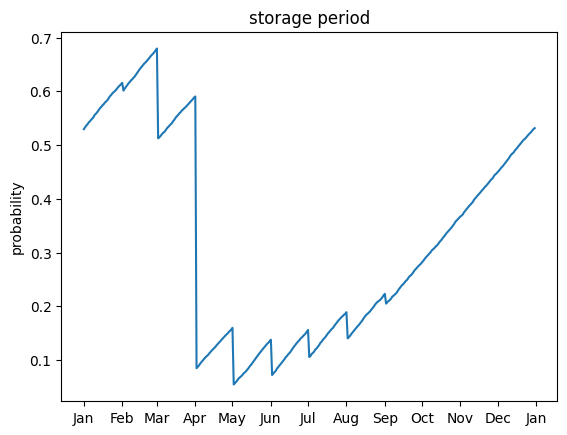

In [13]:
# add second year storage to first year
oneYearPeriod = []
for p in range(len(monteCarloPeriod)):
    if p >= 365:
        value = monteCarloPeriod[p-365] + monteCarloPeriod[p]
        oneYearPeriod.append(value)

# normalize
normalized = []
for day in oneYearPeriod:
    val = day/iterations
    normalized.append(val)

# save storage period as .csv
normalized = pd.DataFrame(normalized)
normalized.to_csv('data/storage_period.csv', index=False, header=False)

# plot storage period
fig, ax = plt.subplots()

ax.plot(range(len(normalized)), normalized)

ax.set_title('storage period')
ax.set_ylabel('probability')
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

plt.show()